In [40]:
%matplotlib inline
import pandas
import numpy


In [36]:
# Some data from
# https://ioprog.com/2017/08/01/weather-station-part-3-putting-it-all-together/
current_draws = {
    'stm32f030-deepsleep': 90e-6, # theoreticlly should be 10uA
    'stm32f030-running-8mhz': 22e-3,
    'NRF905-off': 3e-6,
    'NRF905-standby': 32e-6,
    'NRF905-transmit-6dm': 20e-3,
    
    # TODO: get proper data
    'lora-idle': 20e-6,
    'lora-listening': 20e-3,
    'lora-transmitting': 100e-3,
    
    'sensor-sleep': 50e-6,
    'sensor-running': 1e-3,
}
components = pandas.DataFrame({
    'current': list(current_draws.values()),
}, index=current_draws.keys())

components

,current
stm32f030-deepsleep,0.000090
stm32f030-running-8mhz,0.022000
NRF905-off,0.000003
NRF905-standby,0.000032
NRF905-transmit-6dm,0.020000
lora-idle,0.000020
lora-listening,0.020000
lora-transmitting,0.100000
sensor-sleep,0.000050
sensor-running,0.001000


,active,current,voltage,power
readsensor,0.001333,0.023003,3.3,0.000101
transmit,0.000022,0.042050,3.3,0.000003
idle,0.998644,0.000143,3.3,0.000471


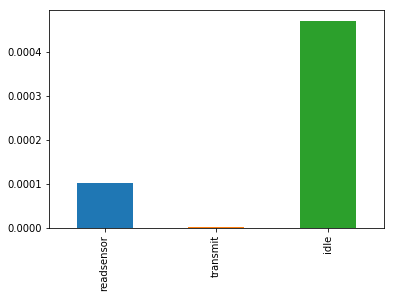

In [54]:
states = {
    'readsensor': ['stm32f030-running-8mhz', 'sensor-running', 'NRF905-off'],
    'transmit': ['stm32f030-running-8mhz', 'sensor-sleep', 'NRF905-transmit-6dm'],
    'idle': ['stm32f030-deepsleep', 'sensor-sleep', 'NRF905-off'],
}
def current(cc):
    currents = list(components['current'][c] for c in cc)
    total = sum(currents)
    return total

def sending_time(interval, rate, size):
    sendtime = size / rate
    sendratio = sendtime / interval 
    return sendratio

def reading_time(interval, per_reading):
    return per_reading / interval

reading = reading_time(15, 20e-3)
sending = sending_time(15*60, rate=50e3, size=1e3)
idle = 1.0 - reading - sending

power = pandas.DataFrame({
    'current': [ current(c) for s,c in states.items() ],
    'voltage': [3.3] * len(states.items()),
    'active': [ reading, sending, idle ],
}, index=states.keys())
power['power'] = power['voltage'] * power['current'] * power['active'] 


power['power'].plot(kind='bar')

power

In [2]:
# TODO: consider minimum transmission time, incl ACK time
# TODO: consider retransmissions

# TODO: comparisons
# different state mixes, enabled by software/ML architectures
# different components. NRF5. Lora versus BTLE

# TODO: calculate expected battery lifetime
# consider self-discharge on baseline